In [5]:
import pandas as pd
import numpy as np
import json
import pickle
import tensorflow as tf
from flask import  Flask, request, jsonify, render_template

In [6]:
app = Flask('Report')

In [7]:
@app.route('/api',methods=['POST'])
def predict_divorce(): 
    data = request.get_json(force=True)   
    data_class = data['features'][0]
    data_class = np.array(data_class).reshape(1, -1)
    Report_or_classif = data['Report_or_classif'][0]
    data_time = data['time'][0]
    
    import pickle
    
    if Report_or_classif == 0 or Report_or_classif == 2: 
        
        

        with open('model_scaler.pkl', 'rb') as f_model_scaler:
            scaler = pickle.load(f_model_scaler) 

        log = tf.keras.models.load_model('LogRegModel')

        prediction = log.predict(scaler.transform(data_class)) > 0.5   
        
    if Report_or_classif == 1 or Report_or_classif == 2:  
        
        with open('model_prophet.pkl', 'rb') as f_model_prophet:
            prophet = pickle.load(f_model_prophet) 
            
        future = prophet.make_future_dataframe(periods=data_time)
        future_forecast = prophet.predict(future)

        future_forecast  = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        future_forecast['month'] = pd.DatetimeIndex(future_forecast.ds).month
        result = future_forecast[future_forecast.month > 5].groupby(['month'])['yhat',"yhat_lower","yhat_upper"].mean()
        timeprediction = result.to_string()    


        fig1 = prophet.plot(future_forecast).savefig("Plot1");  
    
    
    if Report_or_classif == 0:
        return(str(prediction[0]))
    elif Report_or_classif == 1:
        return(timeprediction)
    else:
        return(str(prediction[0]) + ':' + timeprediction)   
    

 * Serving Flask app "Report" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
INFO:werkzeug: * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
C:\Users\gonzalo\.conda\envs\personales\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
127.0.0.1 - - [04/Jun/2021 20:18:07] "POST /api HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2021 20:18:07] "POST /api HTTP/1.1" 200 -


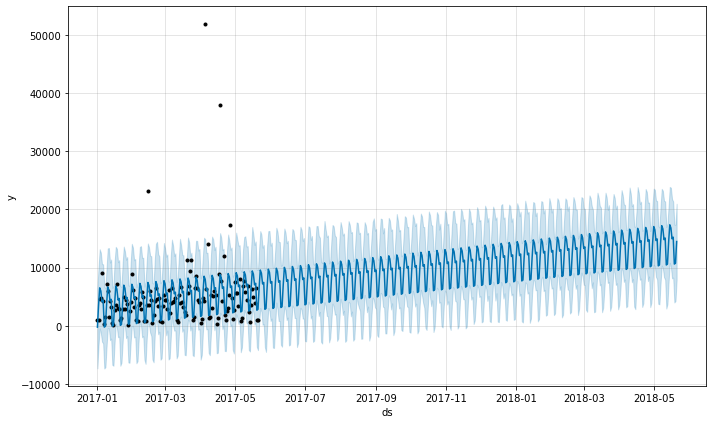

In [8]:
app.run(host='0.0.0.0')